In [1]:
# Mount Google Drive to access and store files in '/content/gdrive'
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Change working directory
import os
# TODO: Specify your path here
new_directory = "/content/gdrive/Othercomputers/Mein MacBook Pro/Drive/dl_proj"
os.chdir(new_directory)
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/gdrive/Othercomputers/Mein MacBook Pro/Drive/dl_proj


In [3]:
# imports
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from models.networks import get_model
from data_utils.data_stats import *

import matplotlib.pyplot as plt

In [4]:
dataset = 'cifar10'                 # One of cifar10, cifar100, stl10, imagenet or imagenet21
architecture = 'B_12-Wi_512'
data_resolution = 32                # Resolution of data as it is stored
crop_resolution = 64                # Resolution of fine-tuned model (64 for all models we provide)
num_classes = CLASS_DICT[dataset]
#data_path = './beton/'
eval_batch_size = 512
checkpoint = 'in21k_cifar10'        # This means you want the network pre-trained on ImageNet21k and finetuned on CIFAR10

In [5]:
# TODO: Do not forget to choose GPU as runtime
torch.backends.cuda.matmul.allow_tf32 = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO: Create a folder called 'checkpoints'. It is already included in the .gitignore file
# Define the model and specify the pre-trained weights
model = get_model(architecture=architecture, resolution=crop_resolution, num_classes=num_classes, checkpoint=checkpoint)
model.cuda()

Weights already downloaded
Load_state output <All keys matched successfully>


BottleneckMLP(
  (linear_in): Linear(in_features=12288, out_features=512, bias=True)
  (linear_out): Linear(in_features=512, out_features=10, bias=True)
  (blocks): ModuleList(
    (0-11): 12 x BottleneckBlock(
      (block): Sequential(
        (0): Linear(in_features=512, out_features=2048, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=2048, out_features=512, bias=True)
      )
    )
  )
  (layernorms): ModuleList(
    (0-11): 12 x LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
)

In [6]:
transform = transforms.Compose([
    transforms.Resize((crop_resolution, crop_resolution)),
    transforms.ToTensor(),
])

In [7]:
# ./data folder is not uploaded to Github. See .gitignore
cifar10_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

Files already downloaded and verified


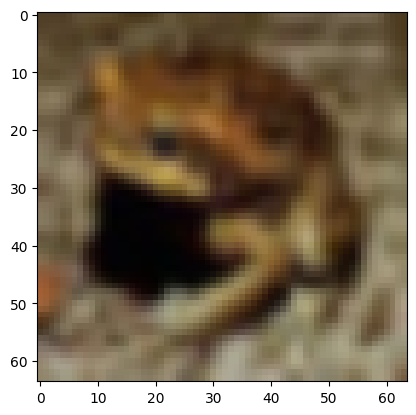

In [8]:
# select test image
image_nr = 300

# display image
image, true_label = cifar10_dataset[image_nr]
image = image.numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.show()

# prepare image to be processed by model
image, _ = cifar10_dataset[image_nr]
image = image.unsqueeze(0)
image = image.view(-1)
image = image.cuda()

In [9]:
model.eval()

with torch.no_grad():
    output = model(image)
    # print("Shape of the output tensor:", output.shape)

probabilities = torch.nn.functional.softmax(output, dim=0)
predicted_class = torch.argmax(probabilities).item()

predicted_label = cifar10_classes[predicted_class]
tr_label = cifar10_classes[true_label]

print(f"Model prediction:", predicted_label)
print(f"True label:      ", tr_label)

Model prediction: frog
True label:       frog
